# Assignment Set 3 - Missing Value Imputations

In [80]:
import pandas as pd
import numpy as np

### Q1. Replace the spaces in my_str with the least frequent character.

In [86]:
# Input
my_str = 'dbc deb abed gade'
seri_mystr= pd.Series(list(my_str))
my_str.replace(" ",seri_mystr.dropna().value_counts().index[-1])

'dbcgdebgabedggade'

### Q2. Check if df has any missing values.

In [88]:
# Input
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.isna().values.any()

True

### Q3. Count the number of missing values in each column of df. Which column has the maximum number of missing values?

In [20]:
# Input
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.isna().sum()

Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags                6
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64

### Q4. Showcase the missing values in each column of df visually

<Axes: >

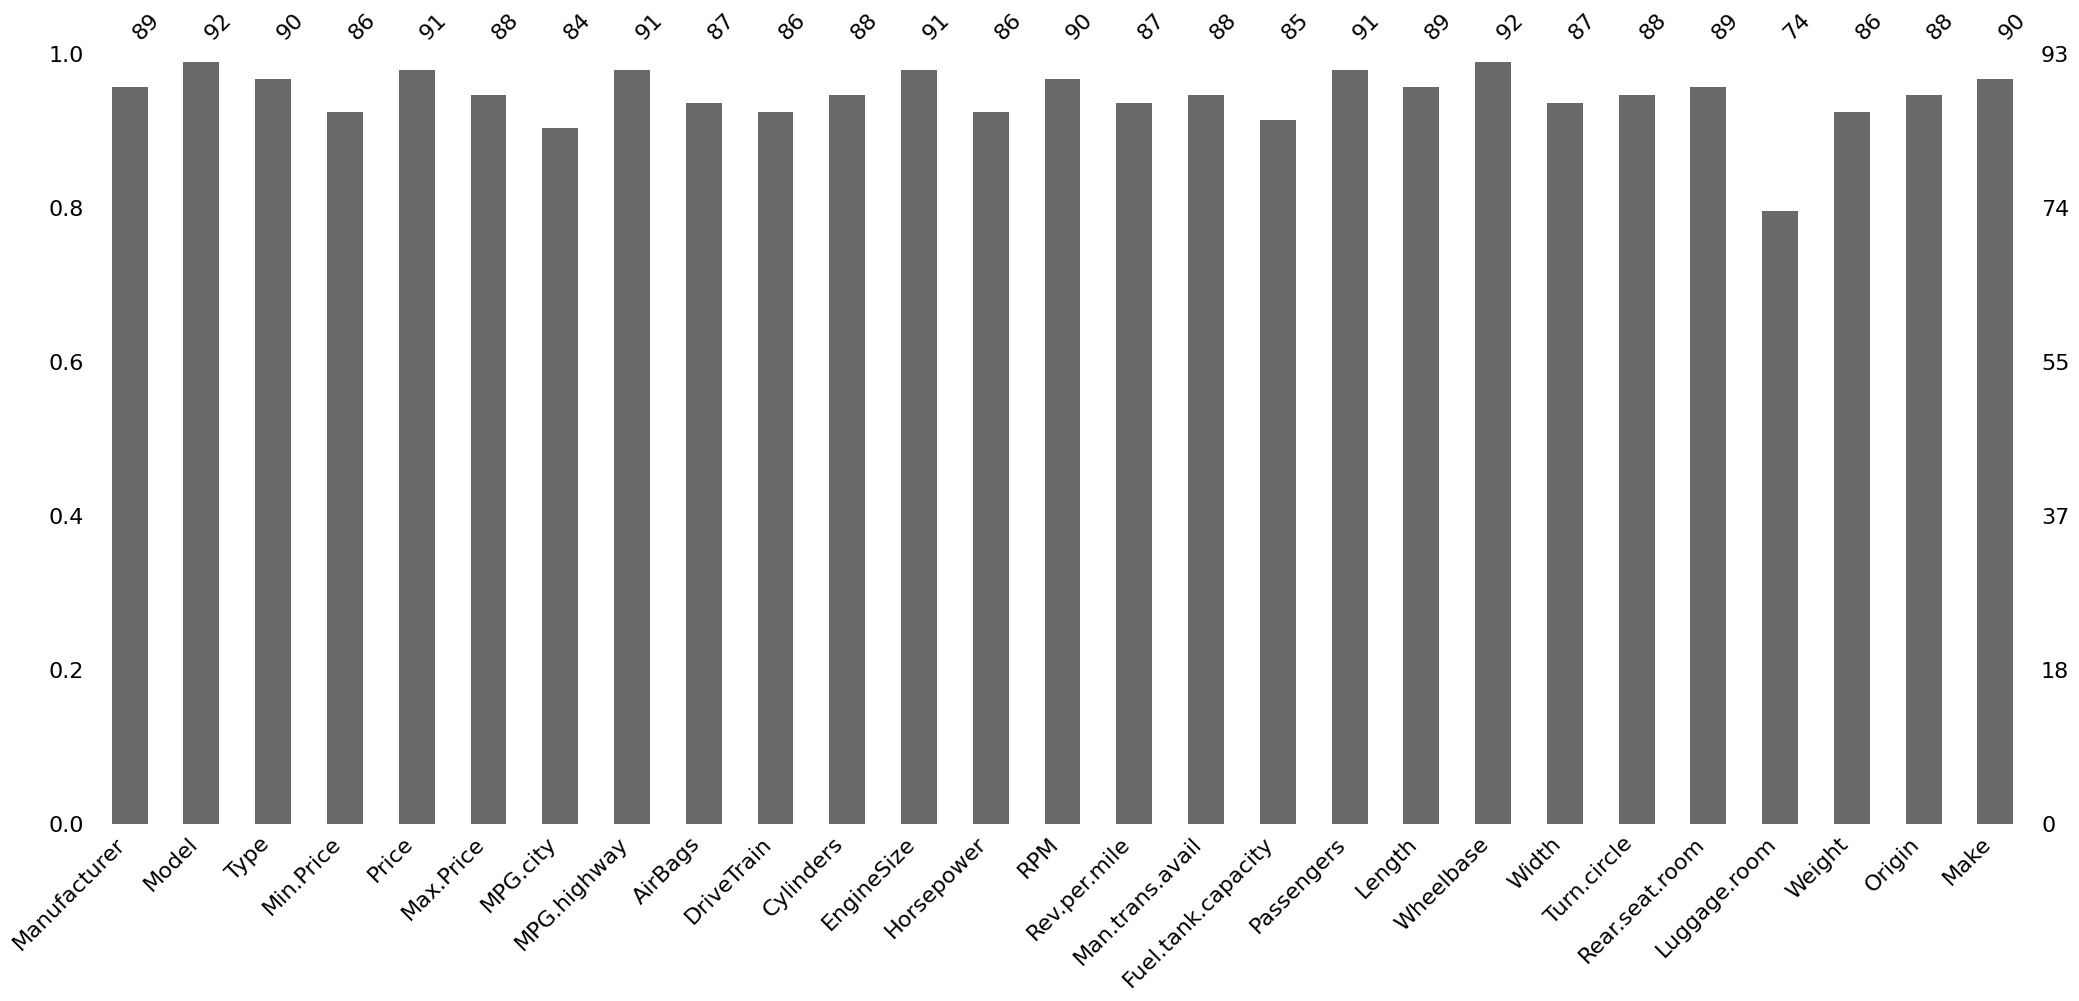

In [23]:
# Input
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
import missingno as msno
msno.bar(df)

### Q5. Replace missing values in Min.Price and Max.Price columns with their respective mean.

In [167]:
# Input
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
min_mean= df['Min.Price'].mean()
max_mean= df['Max.Price'].mean()

df['Min.Price'].fillna(min_mean,inplace=True)
df['Max.Price'].fillna(max_mean,inplace=True)
df.isna().sum()
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.900000,15.9,18.800000,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.200000,33.9,38.700000,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.900000,29.1,32.300000,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,17.118605,37.7,44.600000,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,17.118605,30.0,21.459091,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.600000,19.7,22.700000,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.600000,20.0,22.400000,21.0,30.0,None,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.900000,23.3,23.700000,18.0,25.0,None,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.800000,22.7,23.500000,21.0,28.0,Driver only,Rear,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


### Q6. Replace missing values in Min.Price columns using cubic interpolation

<Axes: xlabel='Price', ylabel='Min.Price'>

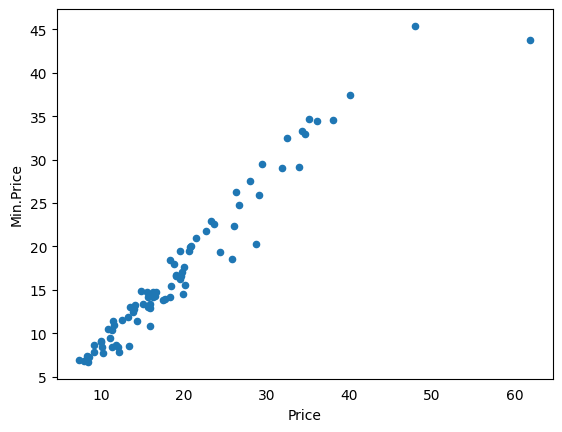

In [210]:
# Input
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.head()

import matplotlib.pyplot as plt
import statsmodels.api as sm


rows_with_nnan= df[df['Min.Price'].isnull()]
rows_with_nnan.index.tolist()
df=df[df['Price'].notna()]
df.plot(x='Price',y='Min.Price',kind='scatter')


In [219]:
df.loc[:,['Min.Price_Cubic']]=df["Min.Price"].reset_index().interpolate(method='cubic',order=2)['Min.Price']


df.loc[:,['min_price_linearinter']] = df.loc[:,["Price","Min.Price"]].sort_values('Price').interpolate()["Min.Price"]
df[["Min.Price","Min.Price_Cubic","min_price_linearinter"]]


,Min.Price,Min.Price_Cubic,min_price_linearinter
0,12.9,12.900000,12.90
1,29.2,29.200000,29.20
2,25.9,25.900000,25.90
3,NaN,18.859494,34.50
4,NaN,13.868578,29.25
...,...,...,...
88,16.6,22.900000,16.60
89,17.6,21.800000,17.60
90,22.9,24.800000,22.90
91,21.8,NaN,21.80


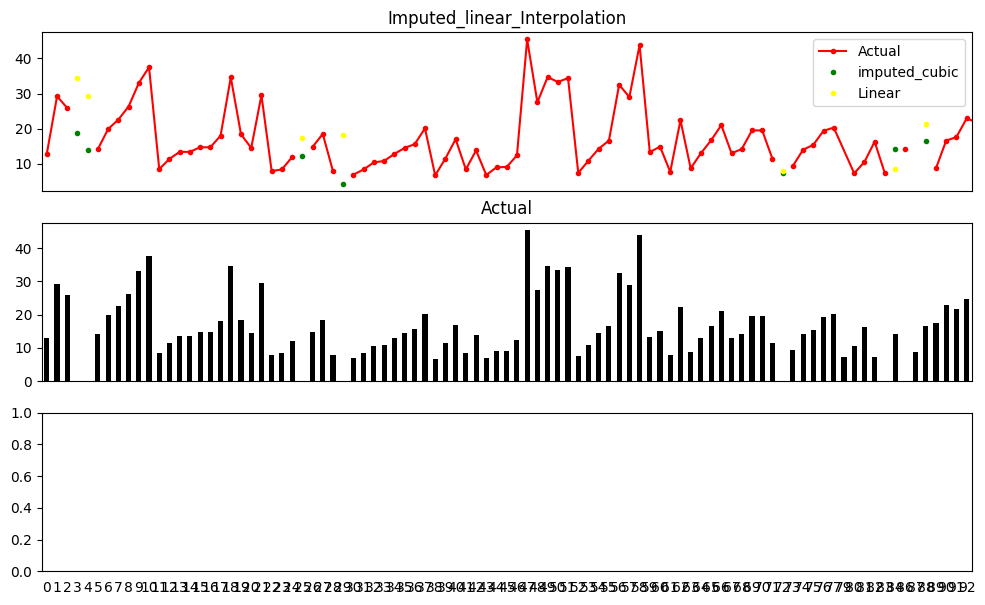

In [224]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,axes=plt.subplots(3,1,sharex=True,figsize=(12,7))
plt.rcParams.update({'xtick.bottom' : False})
df['Min.Price'].plot(title="Actual", style='.-', color='Red',ax=axes[0])
df['Min.Price_Cubic'][rows_with_nnan.index.tolist()].plot(title="Imputed_Circular_Interpolation", style='.', color='Green',ax=axes[0])
df['min_price_linearinter'][rows_with_nnan.index.tolist()].plot(title="Imputed_linear_Interpolation", style='.', color='Yellow',ax=axes[0])


df['Min.Price'].plot(kind='bar',title="Actual", zorder=1, color='Black',ax=axes[1])
axes[0].legend(["Actual","imputed_cubic","Linear"])